In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Obtención de datos históricos
data = yf.download(tickers = 'DIS', start='2023-01-01', end='2023-03-31', rounding = True)
prices = data['Close']
prices

[*********************100%***********************]  1 of 1 completed


Ticker,DIS
Date,
2023-01-03,87.88
2023-01-04,90.86
2023-01-05,90.80
2023-01-06,92.77
2023-01-09,93.61
...,...
2023-03-24,92.93
2023-03-27,94.45
2023-03-28,93.66


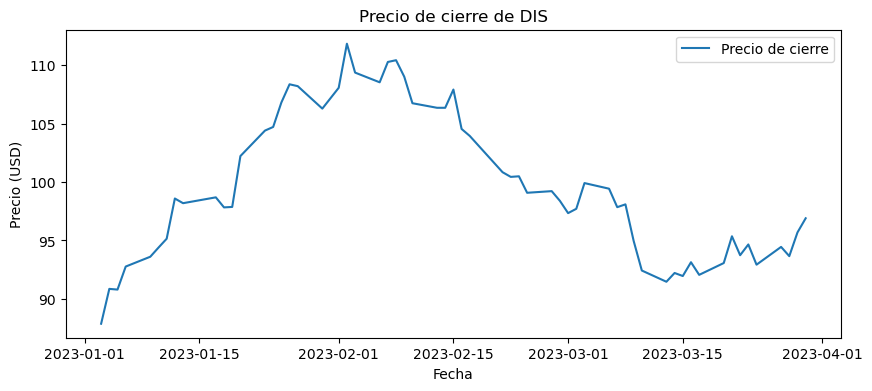

In [21]:
# Análisis exploratorio y preprocesamiento
plt.figure(figsize=(10, 4))
plt.plot(prices, label='Precio de cierre')
plt.title('Precio de cierre de DIS')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

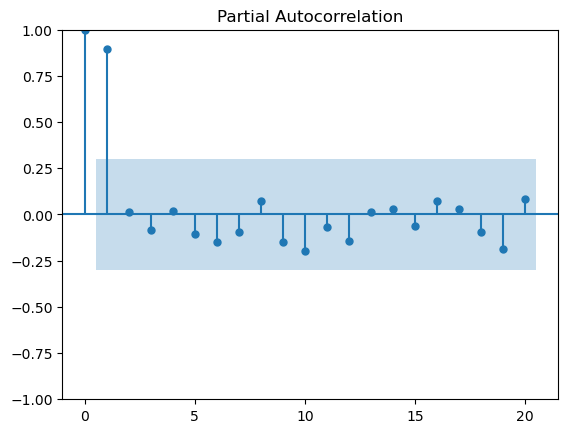

In [23]:
# División de los datos 70%
train_size = int(len(prices) * 0.7)
train, test = prices[:train_size], prices[train_size:]

#Identificación del orden del modelo AR(p) y Gráfica de Autocorrelación Parcial (PACF)
plot_pacf(train, lags=20)
plt.show()

In [27]:
# Cálculo de AIC y BIC para diferentes valores de p
aic_values = []
bic_values = []
for p in range(1, 11):
    model = AutoReg(train, lags=p).fit()
    aic_values.append(model.aic)
    bic_values.append(model.bic)

# Selección del p óptimo
optimal_p = np.argmin(aic_values) + 1
print(f'El orden óptimo del modelo AR es: {optimal_p}')

# Ajuste del modelo AR(p)
model = AutoReg(train, lags=optimal_p).fit()

El orden óptimo del modelo AR es: 10


C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

In [29]:
# Pronóstico para abril de 2023
forecast_start = len(train)
forecast_end = forecast_start + len(test) - 1
predictions = model.predict(start=forecast_start, end=forecast_end, dynamic=False)

# Intervalo de confianza del 90%
predictions_conf_int = model.get_prediction(start=forecast_start, end=forecast_end).conf_int(alpha=0.10)

# Evaluación del modelo
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')

Error Cuadrático Medio (MSE): 68.08207964645683
Error Absoluto Medio (MAE): 7.587695758969722


C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction 

* El MSE tiene un valor granmde, por lo cual nos indica que este modelo tiene errores considerables de prediccion

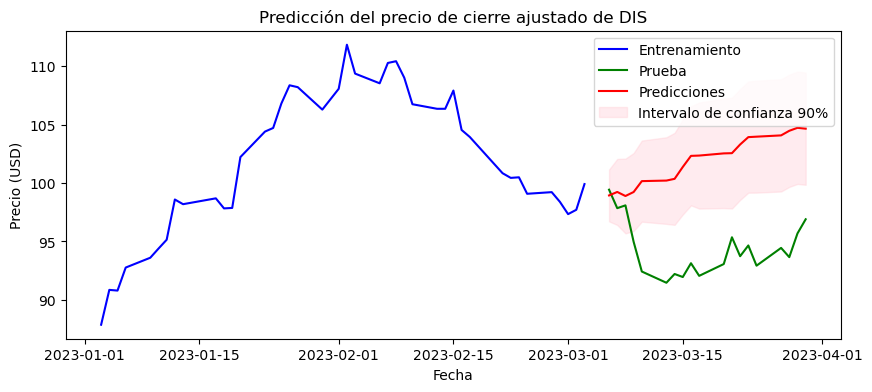

In [35]:
# 8. Visualización de resultados
plt.figure(figsize=(10, 4))
plt.plot(train.index, train, label='Entrenamiento', color='blue')
plt.plot(test.index, test, label='Prueba', color='green')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.fill_between(test.index, predictions_conf_int["lower"], predictions_conf_int["upper"], color='pink', alpha=0.3, label='Intervalo de confianza 90%')
plt.title('Predicción del precio de cierre ajustado de DIS')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

In [38]:
# Revision de la estacionaridad
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print(f'Valor p: {result[1]:.4f}')
if result[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie NO es estacionaria. Se recomienda diferenciarla.")

Valor p: 0.0370
La serie es estacionaria.


In [40]:
# Optimizacion el orden p del modelo
for p in range(1, 20):
    model = AutoReg(train, lags=p).fit()
    print(f'Orden {p}: AIC={model.aic:.2f}, BIC={model.bic:.2f}')

Orden 1: AIC=161.75, BIC=166.89
Orden 2: AIC=159.90, BIC=166.66
Orden 3: AIC=157.94, BIC=166.26
Orden 4: AIC=157.03, BIC=166.86
Orden 5: AIC=153.50, BIC=164.78
Orden 6: AIC=149.66, BIC=162.33
Orden 7: AIC=147.60, BIC=161.60
Orden 8: AIC=145.75, BIC=161.02
Orden 9: AIC=141.44, BIC=157.90
Orden 10: AIC=133.89, BIC=151.47
Orden 11: AIC=123.43, BIC=142.07
Orden 12: AIC=114.89, BIC=134.51
Orden 13: AIC=111.70, BIC=132.21
Orden 14: AIC=109.90, BIC=131.21
Orden 15: AIC=106.57, BIC=128.60
Orden 16: AIC=106.01, BIC=128.65
Orden 17: AIC=104.22, BIC=127.38
Orden 18: AIC=104.04, BIC=127.61
Orden 19: AIC=84.69, BIC=108.53


C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

In [42]:
# Modelo con p = 10
model_p10 = AutoReg(train, lags=10).fit()
predictions_p10 = model_p10.predict(start=len(train), end=len(train) + len(test) - 1)

# Modelo con p = 19
model_p19 = AutoReg(train, lags=19).fit()
predictions_p19 = model_p19.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluación del error
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_p10 = mean_squared_error(test, predictions_p10)
mae_p10 = mean_absolute_error(test, predictions_p10)

mse_p19 = mean_squared_error(test, predictions_p19)
mae_p19 = mean_absolute_error(test, predictions_p19)

print(f"Modelo AR(10) - MSE: {mse_p10:.2f}, MAE: {mae_p10:.2f}")
print(f"Modelo AR(19) - MSE: {mse_p19:.2f}, MAE: {mae_p19:.2f}")

Modelo AR(10) - MSE: 68.08, MAE: 7.59
Modelo AR(19) - MSE: 63.89, MAE: 7.23


C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\lalo1\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will co

# Conclusiones
* En este análisis, se ajustó un modelo AutoRegresivo de orden 19 (AR(19)) para predecir los precios de las acciones de Disney (DIS) con datos históricos del 1 de enero al 31 de marzo de 2023. La selección del orden 𝑝 se basó en los criterios de Akaike (AIC) y Bayesiano (BIC), eligiendo 𝑝=19 por presentar el menor AIC (84.69), lo que indica un mejor ajuste del modelo.
    -Error Cuadrático Medio (MSE): 63.89
    -Error Absoluto Medio (MAE): 7.23
Estos valores reflejan que, en promedio, las predicciones tienen un error de ±7.23 USD respecto al precio real. Aunque se logró una mejora con respecto a modelos de menor orden, el nivel de error sugiere que aún hay incertidumbre en las predicciones.
* El modelo AR(19) es una opción válida para la predicción de precios de Disney, mostrando una mejora respecto a modelos más simples. Sin embargo, su precisión es moderada, y para mejorar su desempeño se recomienda explorar modelos más avanzados como ARIMA o SARIMA.